## 6.5 Machine Learning

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Jeet\Desktop\task6'

In [4]:
#Importing Immoscount_datasets
df = pd.read_pickle(os.path.join(path,'Renting_apartment_data'))

In [5]:
df.shape

(47241, 24)

In [6]:
df.head()

,State,Service_charge,Base_rent,Total_rent,Calculated_total_rent,Telekom-Tv Offer,Newly_construction,Balcony,No of Pictures,Price trend,...,Kitchen,cellar,Living_space_area,Pets_allowed,Lift,Type of Flat,Number of Rooms,Garden,Living Space Range,Date of posted Ads
0,Nordrhein_Westfalen,245.00,595.0,840.0,840.00,ONE_YEAR_FREE,False,False,6,4.62,...,False,True,86.00,NaN,False,ground_floor,4,True,4,May-19
1,Rheinland_Pfalz,134.00,800.0,NaN,934.00,ONE_YEAR_FREE,False,True,8,3.47,...,False,False,89.00,no,False,ground_floor,3,False,4,May-19
2,Sachsen,255.00,965.0,1300.0,1220.00,ONE_YEAR_FREE,True,True,8,2.72,...,False,True,83.80,NaN,True,apartment,3,False,4,Oct-19
3,Sachsen,58.15,343.0,NaN,401.15,ONE_YEAR_FREE,False,True,9,1.53,...,False,False,58.15,NaN,False,other,3,False,2,May-19
4,Bremen,138.00,765.0,903.0,903.00,NONE,False,True,19,2.46,...,False,False,84.97,NaN,False,apartment,3,False,4,Feb-20


In [7]:
#deleting categorial column, dates, year.
df.drop(['State','Total_rent','Telekom-Tv Offer','Newly_construction',
       'Balcony','No of Pictures ','Telekom Upload Speed',
       'Constructed    Year', 'Scout ID', 'Parking Space', 'Kitchen', 'cellar','Pets_allowed', 'Lift', 'Type of Flat','Garden', 'Living Space Range',
       'Date of posted Ads','Price trend'],axis = 1, inplace = True)

In [8]:
df.columns

Index(['Service_charge', 'Base_rent', 'Calculated_total_rent',
       'Living_space_area', 'Number of Rooms'],
      dtype='object')

In [9]:
df.head()

,Service_charge,Base_rent,Calculated_total_rent,Living_space_area,Number of Rooms
0,245.00,595.0,840.00,86.00,4
1,134.00,800.0,934.00,89.00,3
2,255.00,965.0,1220.00,83.80,3
3,58.15,343.0,401.15,58.15,3
4,138.00,765.0,903.00,84.97,3


### 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3114060064573.216,
 -69308495910.00769,
 -26690339070.468243,
 -11595154460.917995,
 -6704618920.427797,
 -4336999026.68664,
 -3062923052.6130404,
 -2388380995.5149946,
 -1876373022.6430576]

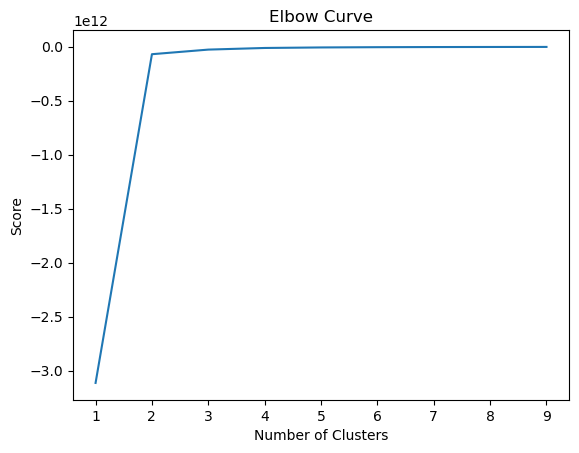

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In the elbow curve, there's a large jump from one to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

In [16]:
df.head()

,Service_charge,Base_rent,Calculated_total_rent,Living_space_area,Number of Rooms,clusters
0,245.00,595.0,840.00,86.00,4,0
1,134.00,800.0,934.00,89.00,3,0
2,255.00,965.0,1220.00,83.80,3,0
3,58.15,343.0,401.15,58.15,3,0
4,138.00,765.0,903.00,84.97,3,0


In [17]:
df['clusters'].value_counts()

0    47239
1        1
2        1
Name: clusters, dtype: int64

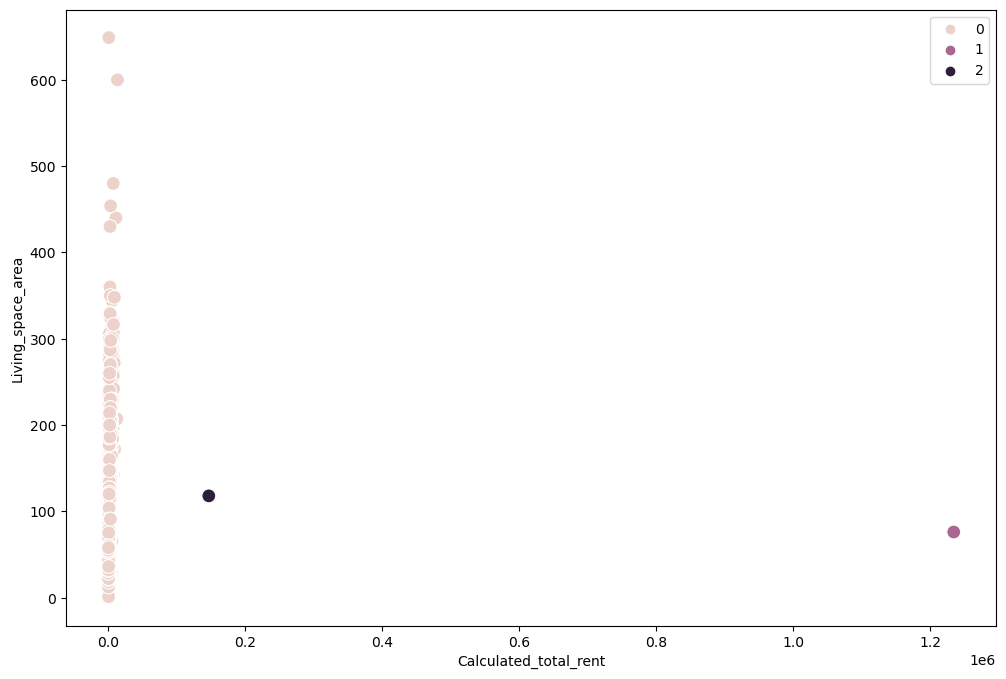

In [18]:
# Plot the clusters for the "Calculated_total_rent" and "Living_space_area" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Calculated_total_rent'], y=df['Living_space_area'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Calculated_total_rent') # Label x-axis.
plt.ylabel('Living_space_area') # Label y-axis.
plt.show()

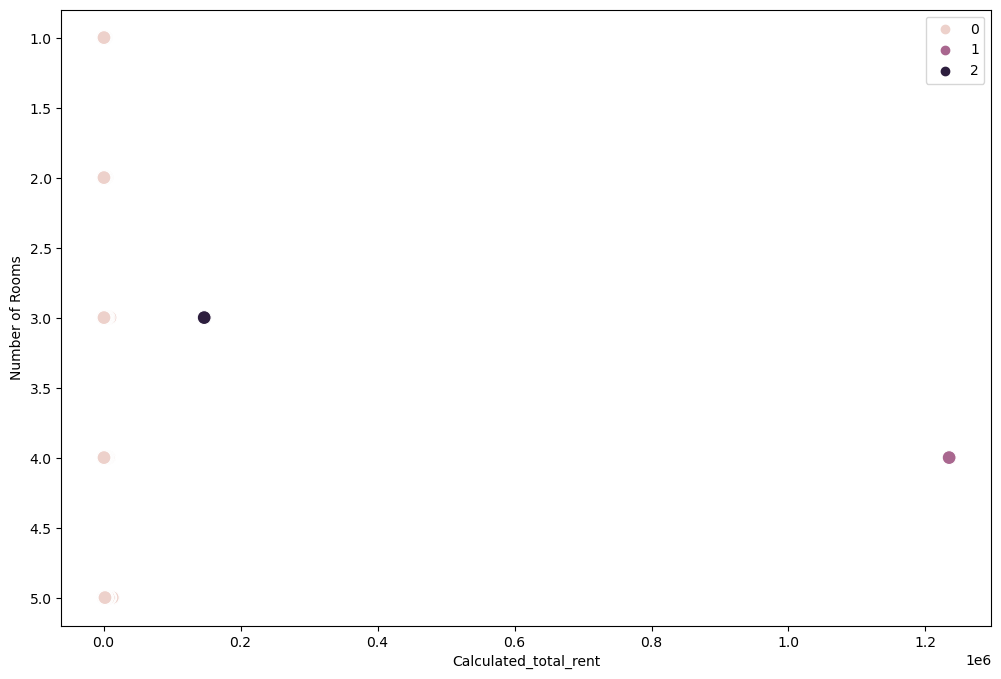

In [19]:
# Plot the clusters for the "Calculated_total_rent" and "Number of Rooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Calculated_total_rent'], y=df['Number of Rooms'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Calculated_total_rent') 
plt.ylabel('Number of Rooms') 
plt.show()

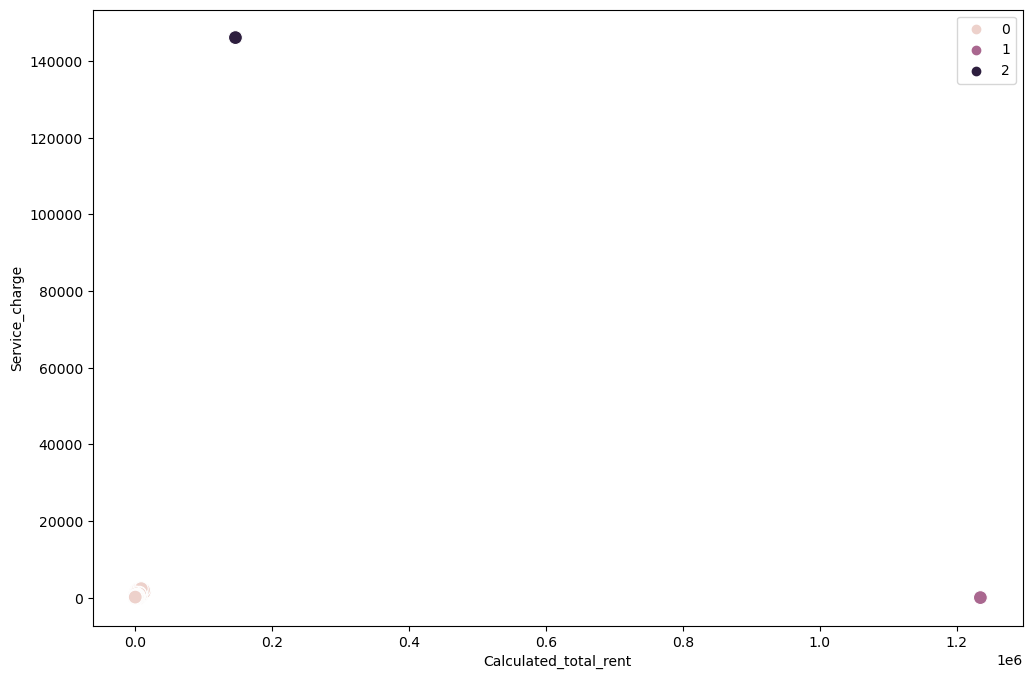

In [24]:
# Plot the clusters for the "Calculated_total_rent" and "Service Charges" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Calculated_total_rent'], y=df['Service_charge'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Calculated_total_rent') 
plt.ylabel('Service_charge') 
plt.show()

# Observation

Unsupervised Machines learning clustering charts more suits in Small data and not a categorial datasets.
In my Dataset, it doesnot suit because of huge data with small values. Although from seeing the clustering charts help in 
getting real picture of the data set.

In [20]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [ ]:
df.groupby('cluster').agg({'Service_charge':['mean', 'median'], 
                         'Calculated_total_rent':['mean', 'median'], 
                         'Number of Rooms':['mean', 'median'],
                          'Living_space_area':['mean','median']})